In [ ]:
%matplotlib inline
!pip install fastf1
!pip install timple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 8.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
from timple.timedelta import strftimedelta
import fastf1
import fastf1.plotting
from fastf1.core import Laps
import pandas as pd
from fastf1 import utils
from fastf1 import plotting
import matplotlib.font_manager as fm


In [ ]:
fastf1.Cache.enable_cache('/content/sample_data')  # replace with your cache directory


In [ ]:
session_fp3 = fastf1.get_session(2023,1,'FP1')
session_fp3.load()

In [ ]:
session_q = fastf1.get_session(2022,1,'Q')
session_q.load()

In [ ]:
year = 2022
wknd = 1
ses = 'Q'
drv1 = 'ALO'
drv2 = 'SAI'

session = fastf1.get_session(year, wknd, ses)
session.load()


In [ ]:
drv1_lap = session_fp3.laps.pick_driver(drv1).pick_fastest()
drv2_lap = session_fp3.laps.pick_driver(drv2).pick_fastest()

drv1_tel = drv1_lap.get_car_data().add_distance()
drv2_tel = drv2_lap.get_car_data().add_distance()

color1=plotting.team_color(drv1_lap['Team'])
color2=plotting.team_color(drv2_lap['Team'])

delta_time, ref_tel, compare_tel = utils.delta_time(drv1_lap, drv2_lap)


In [ ]:
print(session_fp3.)

RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022
EventDate                                   2022-03-20 20:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2022-03-18 15:00:00
Session2                                             Practice 2
Session2Date                                2022-03-18 18:00:00
Session3                                             Practice 3
Session3Date                                2022-03-19 15:00:00
Session4                                             Qualifying
Session4Date                                2022-03-19 18:00:00
Session5                                

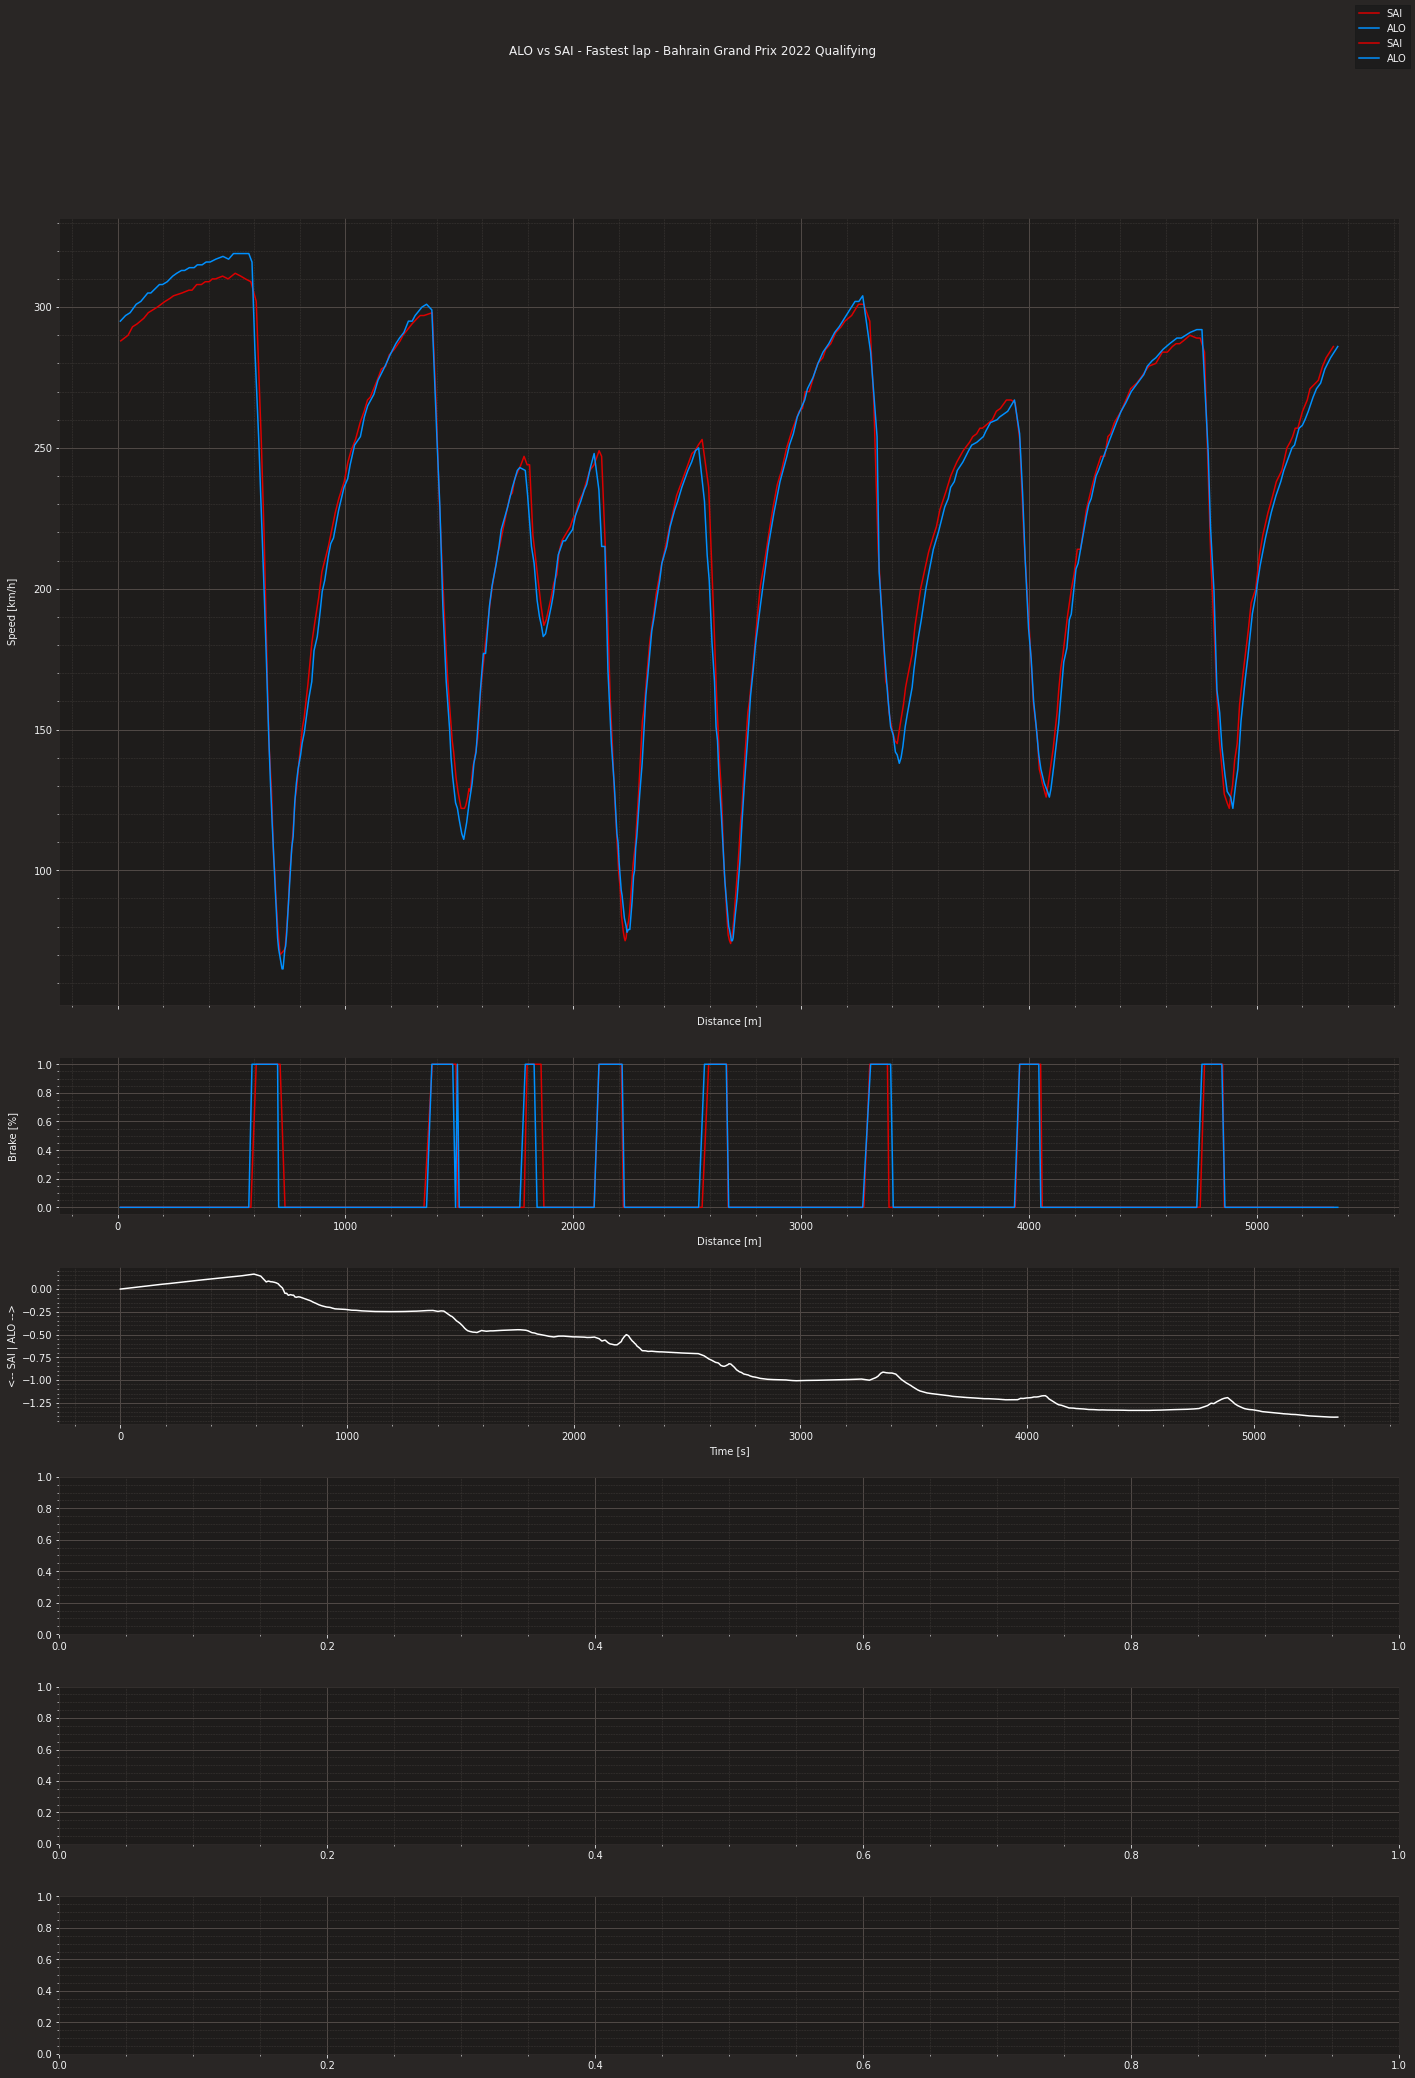

In [ ]:
fastf1.plotting.setup_mpl()

fig, ax = plt.subplots(6, figsize=(20, 30), gridspec_kw={'height_ratios': [5, 1, 1, 1, 1, 1]})

fig.suptitle(f'{drv1_lap.Driver} vs {drv2_lap.Driver} - Fastest lap - {session_fp3.event.EventName} {year} Qualifying')

ax[0].plot(drv2_tel['Distance'], drv2_tel['Speed'], color=color2, label=drv2)
ax[0].plot(drv1_tel['Distance'], drv1_tel['Speed'], color=color1, label=drv1)

ax[1].plot(drv2_tel['Distance'], drv2_tel['Brake'], color=color2, label=drv2)
ax[1].plot(drv1_tel['Distance'], drv1_tel['Brake'], color=color1, label=drv1)

ax[2].plot(ref_tel['Distance'], delta_time, color='white')

ax[0].set_ylabel("Speed [km/h]")
ax[0].set_xlabel("Distance [m]")

ax[1].set_ylabel("Brake [%]")
ax[1].set_xlabel("Distance [m]")

ax[2].set_ylabel(f'<-- {drv2} | {drv1} -->')
ax[2].set_xlabel("Time [s]")

ax[0].get_xaxis().set_ticklabels([])


fig.align_ylabels()
fig.legend()

plt.subplots_adjust(left=0.06 ,right=0.99, top=0.9, bottom=0.05)
plt.show()